# CREATE GRAPHS FOR BASIC METRIC CALCULATIONS

In [50]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.cm
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
notebook_dir = os.getcwd()
os.chdir(notebook_dir)
os.chdir('..')
df1 = pd.read_csv("data/Austin_For_Sale_CLEANED.csv")
df2 = pd.read_csv("data/Austin_Sold_CLEANED.csv")

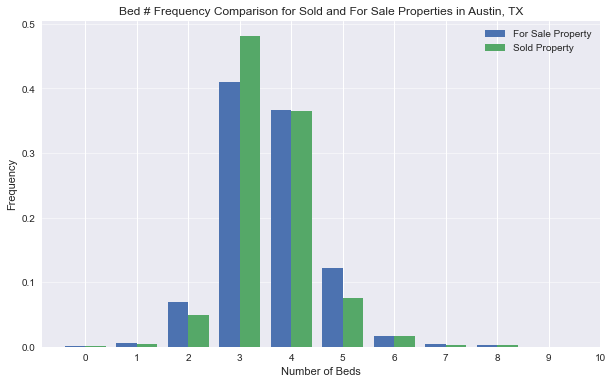

In [4]:
fs_beds = df1.beds
sold_beds = df2.beds
bins = np.arange(df2.beds.nunique()) - 0.5
tick_values = list(range(0, 11, 1))
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8')


plt.hist([fs_beds,sold_beds], bins = bins, rwidth=0.8, range=[0, 11], density=True)
plt.legend(['For Sale Property','Sold Property'],loc='upper right')

plt.xticks(tick_values)
#plt.yticks(np.arange(0, 3500, 500))  

plt.xlabel("Number of Beds")
plt.ylabel("Frequency")
plt.title("Bed # Frequency Comparison for Sold and For Sale Properties in Austin, TX")
plt.grid(which='major', axis='y', zorder=0, alpha = 0.5)



plt.show() 

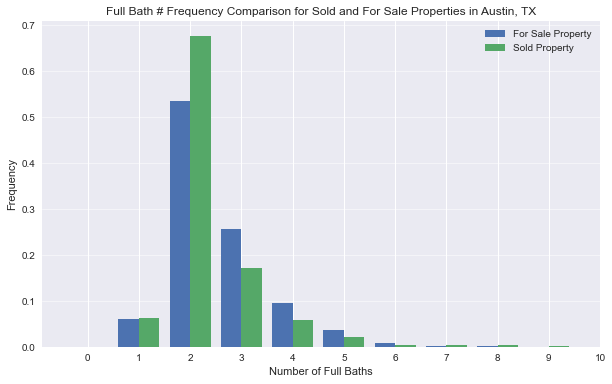

In [5]:
fs_fullbaths = df1.full_baths
sold_fullbaths = df2.full_baths
bins = np.arange(df2.full_baths.nunique()) - 0.5
tick_values = list(range(0, 11, 1))
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8')



plt.hist([fs_fullbaths,sold_fullbaths], bins = bins, rwidth=0.8, range=[0, 11], density=True)
plt.legend(['For Sale Property','Sold Property'],loc='upper right')

plt.xticks(tick_values)
#plt.yticks(np.arange(0, 6000, 500))  
plt.xlabel("Number of Full Baths")
plt.ylabel("Frequency")
plt.title("Full Bath # Frequency Comparison for Sold and For Sale Properties in Austin, TX")
plt.grid(which='major', axis='y', zorder=0, alpha = 0.5)


plt.show() 

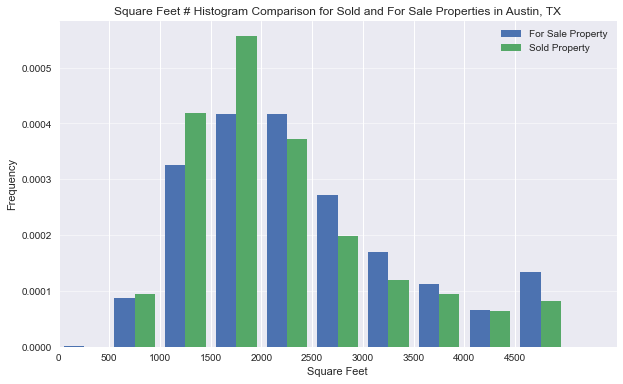

In [6]:
fs_sqft = df1.sqft
sold_sqft = df2.sqft
bins = np.arange(0, 5500, 500)+1
#tick_values = ['0-499', '501-1000', '501-1000', '501-1000', '501-1000', '501-1000', '501-1000', '501-1000', '501-1000', '501-1000']
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8')

weights1 = np.ones_like(fs_sqft) / (len(fs_sqft))
weights2 = np.ones_like(sold_sqft) / (len(sold_sqft))

data = [np.clip(fs_sqft, bins[0], bins[-1]),np.clip(sold_sqft, bins[0], bins[-1])]

plt.hist(data, rwidth=0.8,range=[0, 5000], density=True, bins=bins,weights=[weights1,weights2])
plt.legend(['For Sale Property','Sold Property'],loc='upper right')

xlabels = bins[1:].astype(int).astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 5500])
plt.xticks(500 * np.arange(N_labels))


#plt.xticks(tick_values)
#plt.yticks(np.arange(0, 6000, 500))  
plt.xlabel("Square Feet")
plt.ylabel("Frequency")
plt.title("Square Feet # Histogram Comparison for Sold and For Sale Properties in Austin, TX")
plt.grid(which='major', axis='y', zorder=0, alpha = 0.5)


plt.show() 

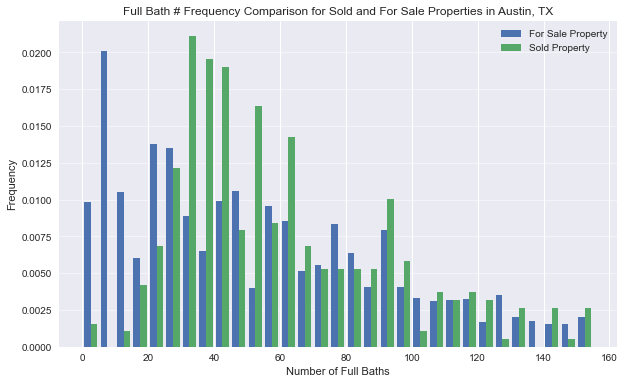

In [7]:
fs_mls = df1.days_on_mls
sold_mls = df2.days_on_mls
bins = np.arange(0, 160, 5)
#tick_values = list(range(0, 11, 1))
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8')


plt.hist([fs_mls,sold_mls], bins = bins, rwidth=0.8, density=True)
plt.legend(['For Sale Property','Sold Property'],loc='upper right')

#plt.xticks(tick_values)
#plt.yticks(np.arange(0, 6000, 500))  
plt.xlabel("Number of Full Baths")
plt.ylabel("Frequency")
plt.title("Full Bath # Frequency Comparison for Sold and For Sale Properties in Austin, TX")
plt.grid(which='major', axis='y', zorder=0, alpha = 0.5)


plt.show() 

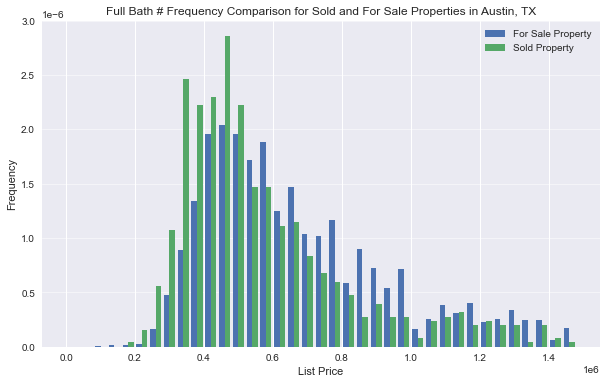

In [8]:
fs_lp = df1.list_price
sold_lp = df2.list_price
bins = np.arange(0, 1500000, 40000)
#tick_values = list(range(0, 11, 1))
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8')


plt.hist([fs_lp,sold_lp], bins = bins, rwidth=0.8, density=True)
plt.legend(['For Sale Property','Sold Property'],loc='upper right')

#plt.xticks(tick_values)
#plt.yticks(np.arange(0, 6000, 500))  
plt.xlabel("List Price")
plt.ylabel("Frequency")
plt.title("Full Bath # Frequency Comparison for Sold and For Sale Properties in Austin, TX")
plt.grid(which='major', axis='y', zorder=0, alpha = 0.5)


plt.show() 

### Correlation heat map

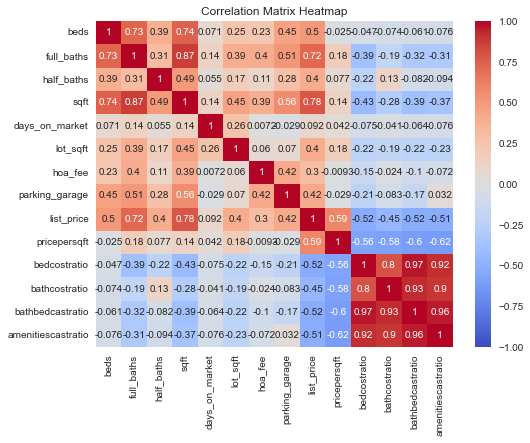

In [10]:
corr = df2[['beds','full_baths', 'half_baths' ,'sqft','days_on_market','lot_sqft','hoa_fee','parking_garage','list_price','pricepersqft','bedcostratio', 'bathcostratio', 'bathbedcastratio', 'amenitiescastratio']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
df2.days_on_market

0       75
1       34
2      112
3       95
4       92
      ... 
678     45
679     17
680     52
681     95
682     40
Name: days_on_market, Length: 683, dtype: int64

(array([ 4., 13., 38., 79., 52., 49., 77., 35., 35., 44., 23., 30., 25.,
        31., 16., 26., 24., 27., 19.,  2.,  5.,  6.,  3.,  2.,  0.,  2.,
         0.,  1.,  3.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290.]),
 <BarContainer object of 29 artists>)

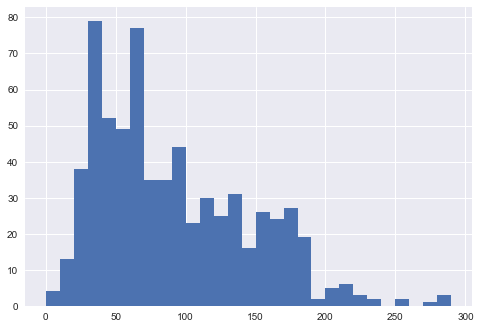

In [12]:
bins = np.arange(0, 300, 10)

plt.hist([df2.days_on_market],bins = bins)


In [13]:
# Calculate quartiles
Q1 = df2['days_on_market'].quantile(0.25)
Q2 = df2['days_on_market'].quantile(0.50)  # This is the median
Q3 = df2['days_on_market'].quantile(0.75)

print(f"Q1: {Q1}")
print(f"Q2: {Q2}")
print(f"Q3: {Q3}")

Q1: 45.0
Q2: 77.0
Q3: 131.0


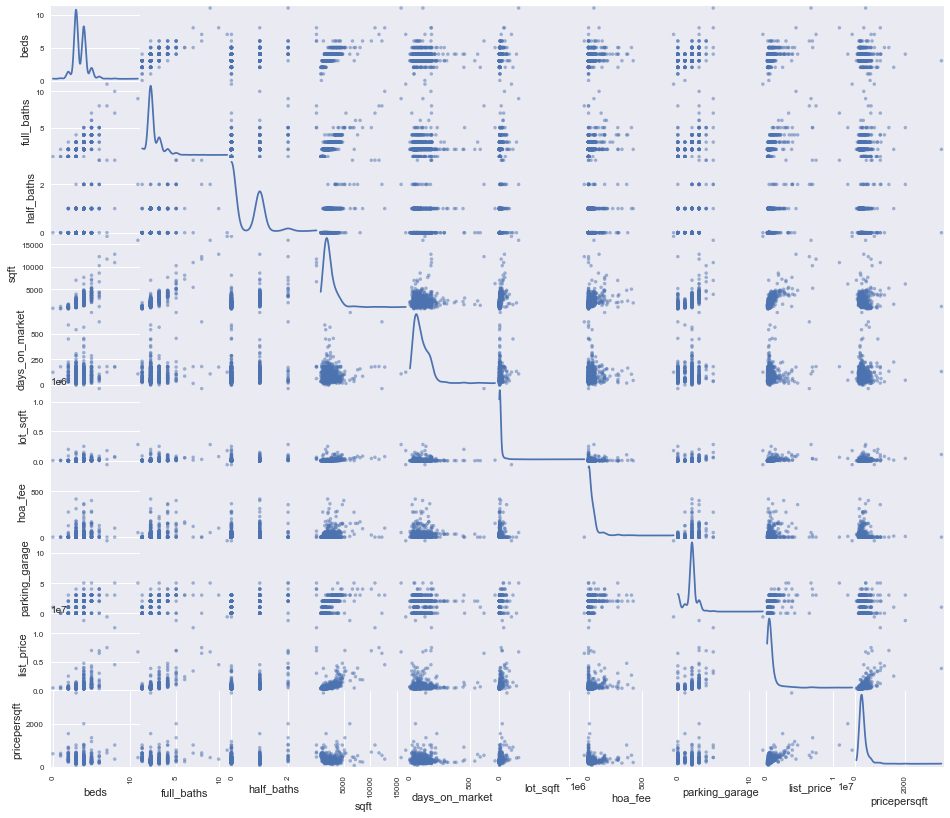

In [20]:
from pandas.plotting import scatter_matrix


scatter_matrix(df2[['beds','full_baths', 'half_baths' ,'sqft','days_on_market','lot_sqft','hoa_fee','parking_garage','list_price','pricepersqft']],figsize=(16,14), diagonal='kde')
#plt.figure(figsize=(12,10))
plt.show()

In [38]:
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)


In [27]:
print(df2.columns.tolist())


['property_url', 'status', 'text', 'style', 'full_street_line', 'street', 'city', 'state', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls', 'list_price', 'list_date', 'last_sold_date', 'assessed_value', 'estimated_value', 'lot_sqft', 'latitude', 'longitude', 'neighborhoods', 'stories', 'hoa_fee', 'parking_garage', 'nearby_schools', 'primary_photo', 'alt_photos', 'geometry', 'Location', 'days_on_market', 'bedcostratio', 'bathcostratio', 'bathbedcastratio', 'amenitiescastratio', 'hashoa', 'days_on_market_quartile', 'pricepersqft', 'datetime', 'season_listed', 'Location_ALLANDALE', 'Location_ANDERSON MILL', 'Location_AVERY RANCH--LAKELINE', 'Location_BARTON CREEK MALL', 'Location_BLUFF SPRINGS', 'Location_BOULDIN CREEK', 'Location_BRENTWOOD', 'Location_BRODIE LANE', 'Location_BULL CREEK', 'Location_Bee Cave', 'Location_CHERRY CREEK', 'Location_CIRCLE C SOUTH', 'Location_CRESTVIEW', 'Location_Cedar Park', 'Location_DAVENPORT LAKE AUSTIN', 'Location_DAWSO

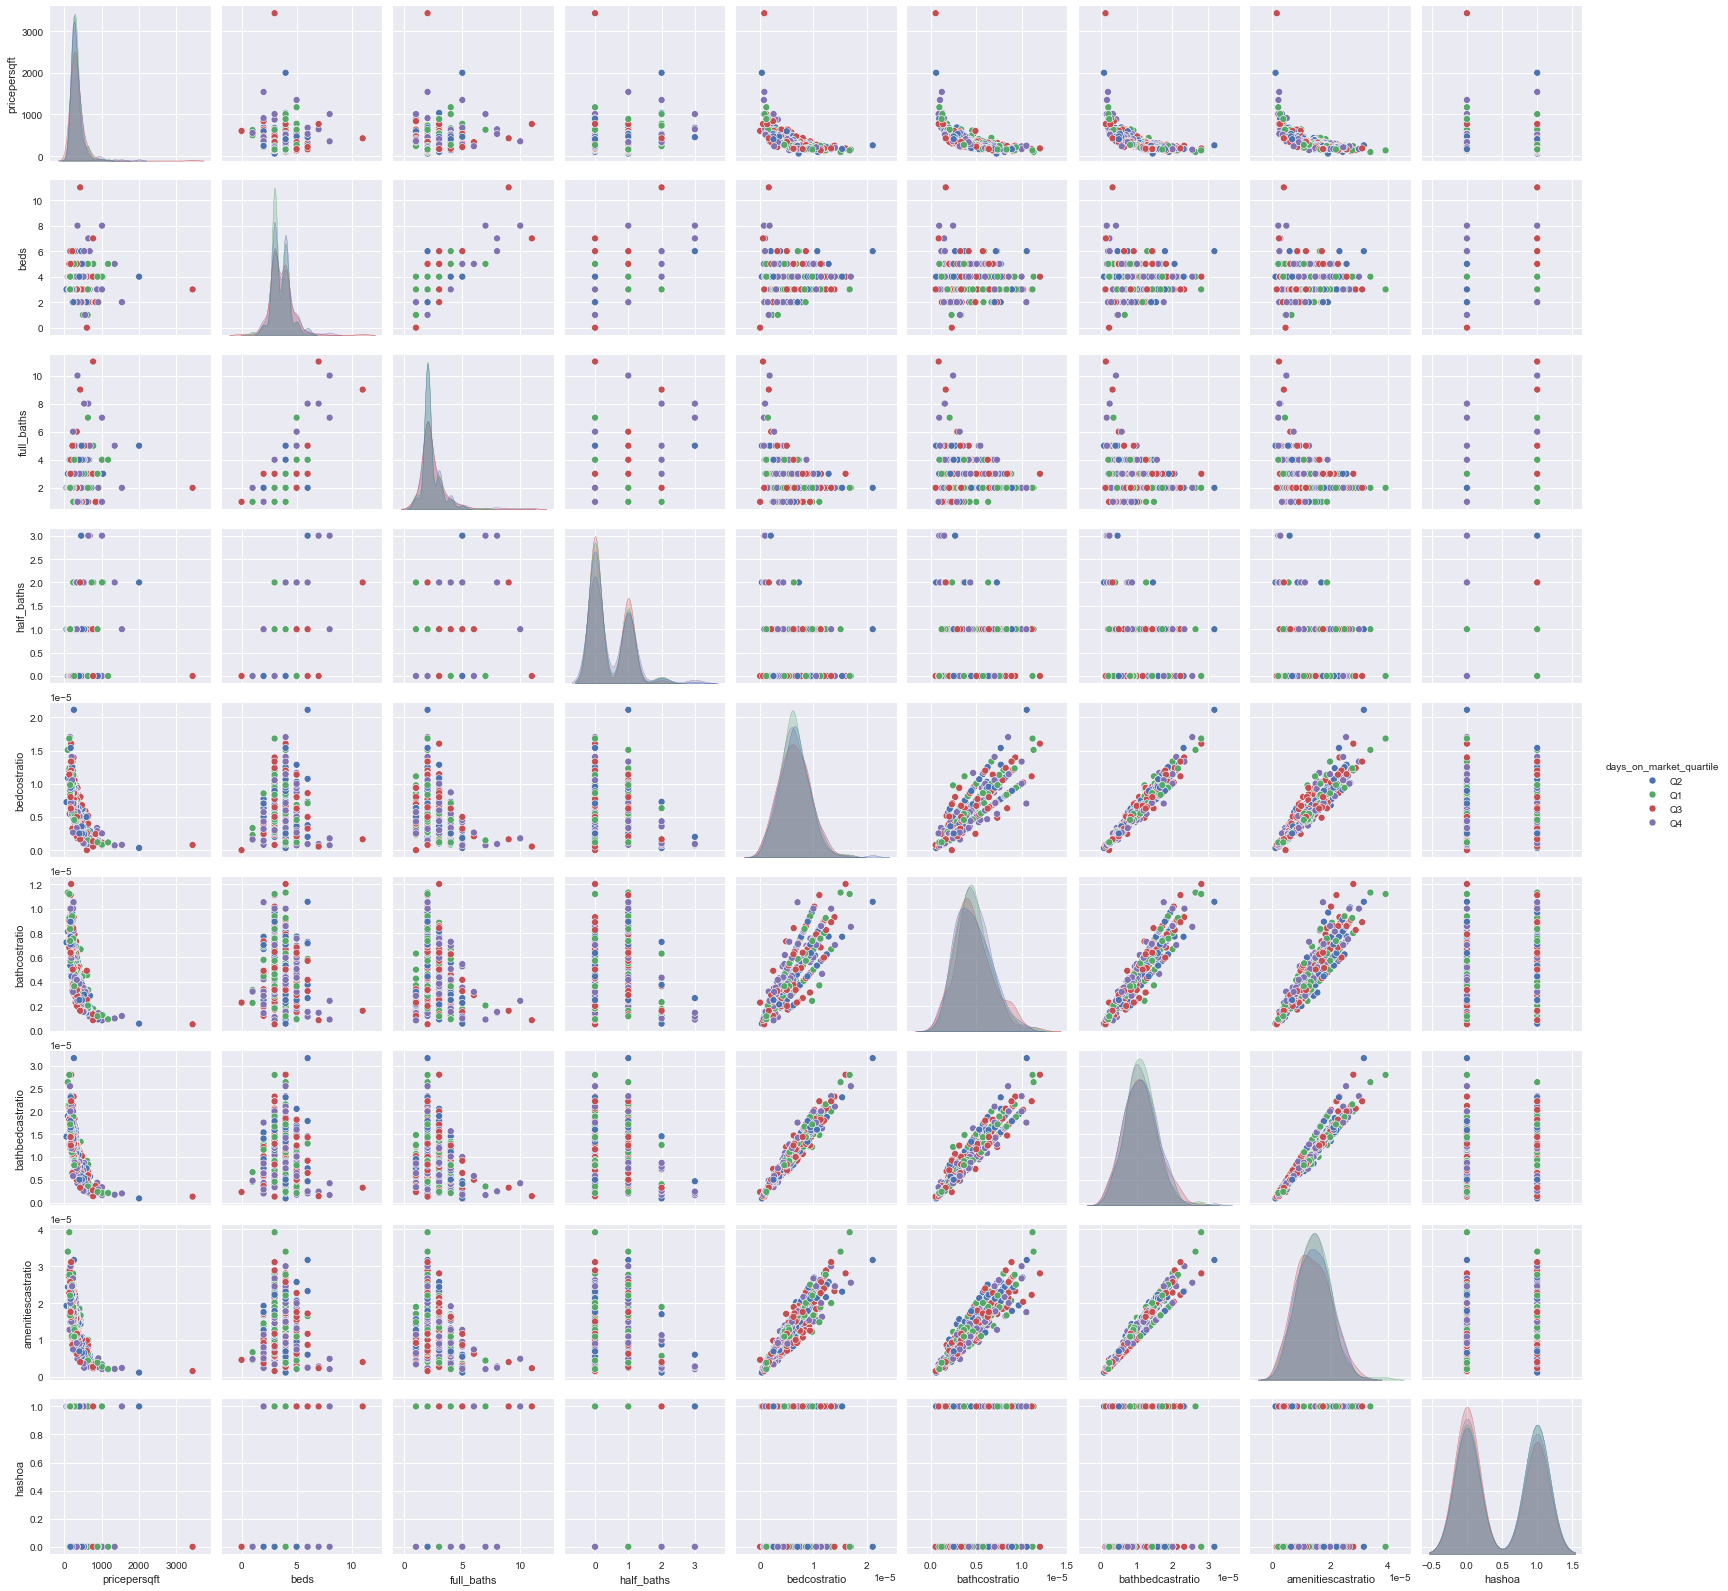

In [80]:
features = ['pricepersqft','beds','full_baths', 'half_baths','amenitiescastratio','hashoa',"season_listed",'days_on_market_quartile']
sns.pairplot(df2[features], hue="days_on_market_quartile")
